# Import Data

In [1]:

import pandas as pd
import numpy as np
np.random.seed(42)
IBMData = pd.read_csv('C:\\Users\\Joyce\\Desktop\\Emory MSBA\\Intro to BA\\IBM Project\\IBM-HR-Employee-Attrition.csv')


IBMData['Attrition'] = IBMData['Attrition'].map({'Yes': 1, 'No': 0})

#Remove unvalue attritbues
IBMData = IBMData.drop(columns=['EmployeeNumber','StandardHours','Over18','EmployeeCount','Department','EducationField',
                               'Gender','JobRole','YearsWithCurrManager'])

#Some attributes are numerical in the dataset, but actually they are categorical 
IBMData['Education']=pd.Categorical(IBMData.Education)
IBMData['EnvironmentSatisfaction']=pd.Categorical(IBMData.EnvironmentSatisfaction)
IBMData['JobInvolvement']=pd.Categorical(IBMData.JobInvolvement)
IBMData['JobLevel']=pd.Categorical(IBMData.JobLevel)
IBMData['JobSatisfaction']=pd.Categorical(IBMData.JobSatisfaction)
IBMData['PerformanceRating']=pd.Categorical(IBMData.PerformanceRating)
IBMData['RelationshipSatisfaction']=pd.Categorical(IBMData.RelationshipSatisfaction)
IBMData['WorkLifeBalance']=pd.Categorical(IBMData.WorkLifeBalance)
IBMData['StockOptionLevel']=pd.Categorical(IBMData.StockOptionLevel)

# Data Processing and Preparation

In [2]:
IBMData['BusinessTravel'] = IBMData['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
IBMData['MaritalStatus'] = IBMData['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
IBMData['OverTime'] = IBMData['OverTime'].map({'No': 0, 'Yes': 1})


FEATURE_NAMES = ['Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'HourlyRate',
 'JobLevel',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
'TotalSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole', 
 'DistanceFromHome',
 'YearsSinceLastPromotion'
 ]


## Feature Engineering

In [3]:

IBMData['TotalSatisfaction'] = IBMData.loc[:, ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                                              'RelationshipSatisfaction','WorkLifeBalance']].sum(axis=1)
IBMData['TotalSatisfaction'].describe()

#Declare X and y
X = IBMData[['Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'HourlyRate',
 'JobLevel',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
'DistanceFromHome',
 'YearsSinceLastPromotion'
]].values
y = IBMData['Attrition'].values


## Make Target Variable Balanced

In [4]:
from sklearn.utils import resample

# Number of class 1 samples before
print('Number of class 1 (Attrition) samples before:', X[y == 1].shape[0])

X_upsampled, y_upsampled = resample(X[y == 1], # Indexable data-structures as input
                                    y[y == 1],
                                    replace=True,      # Implements resampling with replacement.
                                    n_samples=X[y == 0].shape[0], # Number of samples to generate i.e., 357
                                    random_state=42) # The seed of the pseudo random number generator to use when shuffling the data

# Number of class 1 samples after oversampling rare class
print('Number of class 1 (Attrition) samples after:', X_upsampled.shape[0])

Number of class 1 (Attrition) samples before: 237
Number of class 1 (Attrition) samples after: 1233


In [7]:
# After resampling, we can stack the original class 0 with the upsampled class 1 subset to obtain a balanced dataset
# as follows:

X = np.vstack((X[y == 0], X_upsampled))
y = np.hstack((y[y == 0], y_upsampled))

# Consequently if we were to predict the accuracy of the model that always predicts the majority class ~50%
y_pred = np.zeros(y.shape[0])
np.mean(y_pred == y) * 100

50.0

In [8]:
############################################## Split the Data ##############################################
np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection : Logistic Regression, Decision Tree, kNN

10-fold cross validation:

ROC AUC: 0.83 (+/- 0.03) [Logistic Regression]
ROC AUC: 0.93 (+/- 0.01) [Decision Tree]
ROC AUC: 0.88 (+/- 0.01) [KNN]


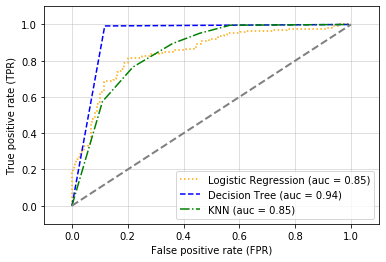

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import matplotlib.pyplot as plt

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')

# Classifiers
# Logistic Regression Classifier
#clf1 = LogisticRegression(penalty='l1', 
                          #C=1,
                          #random_state=10, 
                          #solver='liblinear')
clf1 = LogisticRegression()

# Decision Tree Classifier
#clf2 = DecisionTreeClassifier(max_depth=None,
                              #criterion='gini',
                              #min_samples_leaf = 1,
                              #min_samples_split = 2,
                              #random_state=10)
clf2= DecisionTreeClassifier()

# kNN Classifier
#clf3 = KNeighborsClassifier(n_neighbors=1,
                            #p=2,
                            #metric='minkowski')
        
clf3= KNeighborsClassifier()

# Label the classifiers
clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']
all_clf = [clf1, clf2, clf3]

# Cross - Validation 
print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): 
    scores = cross_val_score(estimator=clf,  
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

#Visualization

colors = [ 'orange', 'blue', 'green']     
linestyles = [':', '--', '-.', '-']        
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_true=y_test, 
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)               
    plt.plot(fpr, tpr,                         
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    
plt.plot([0, 1], [0, 1], 
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   
plt.ylim([-0.1, 1.1])   
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()